## Кокозов С.И. ИУ5-63Б РК1 ТМО Вариант №13

# Задача №2

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Для произвольной колонки данных построить график "Ящик с усами (boxplot)".




In [2]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('states_all_extended.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


## Количественный признак

In [5]:
feature = 'A_A_A'

In [6]:
round(data[data[feature].isnull()].shape[0] / data.shape[0] * 100.0, 2)

4.84

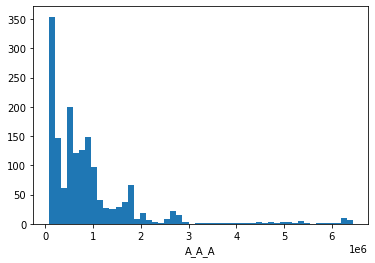

In [7]:
plt.hist(data[feature], 50)
plt.xlabel(feature)
plt.show()

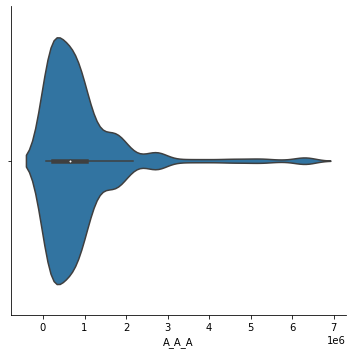

In [8]:
sns.catplot(x=feature, data=data, kind="violin")

In [9]:
data[feature].mean(), data[feature].median(), data[feature].mode()

(913969.4944852941,
 645805.0,
 0    472394.0
 1    490917.0
 2    872436.0
 dtype: float64)

In [10]:
data[[feature]] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(data[[feature]])

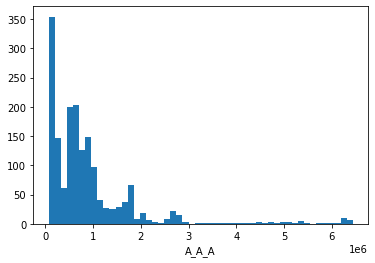

In [11]:
plt.hist(data[feature], 50)
plt.xlabel(feature)
plt.show()

In [12]:
data[feature].mean(), data[feature].median(), data[feature].mode()

(900991.2711370263,
 645805.0,
 0    645805.0
 dtype: float64)

## Категориальный признак

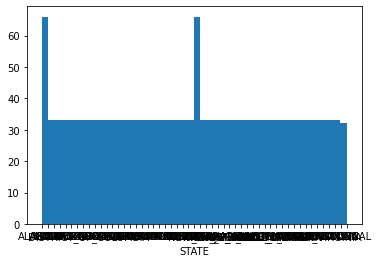

In [13]:
plt.hist(data['STATE'], 50)
plt.xlabel('STATE')
plt.show()

In [14]:
data['MIS_STATE'] = [data['STATE'][i] if i % 20 != 0 else np.nan for i in range(len(data['STATE']))]

In [15]:
print("Пропущенных значений {}%".format(round(data[data['MIS_STATE'].isnull()].shape[0] / data.shape[0] * 100.0, 2)))

Пропущенных значений 5.01%


Заполним пропуски константой 'NA'.

In [19]:
data[['MIS_STATE']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA').fit_transform(data[['MIS_STATE']])

In [20]:
print("Пропущенных значений {}%".format(round(data[data['MIS_STATE'].isnull()].shape[0] / data.shape[0] * 100.0, 2)))

Пропущенных значений 0.0%


Все пропуски заполнены

## Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Лучше всего было бы удалить признаки, в которых больше 5% пропущенных значений. при больших значениях повышается вероятность, что пропуски мы заполнили неправильно. Однако у нас во многих признаков слишком много пропущенных значений, так что повысим наш "порог допустимого" до 30%. Признаки G01-G08_A_A (40.52%), G09-G12_A_A (37.55%), G01_AM_F (76.27%), G01_AM_M (76.21%), G01_AS_F (76.21%), G01_AS_M (76.21%), G01_BL_F (76.21%), G01_BL_M (76.21%), G01_HI_F (76.27%) и т. д.

## Дополнительное задание

<AxesSubplot:xlabel='YEAR'>

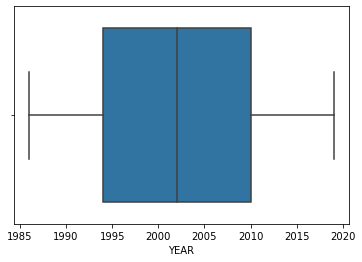

In [23]:
sns.boxplot(x=data['YEAR'])